# Basics of network analysis 

In [2]:
import networkx as nx
import seaborn as sns

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Connectivity and clustering of a graph

We study the network of coauthorships of Astro-Ph, from the SNAP database.

In [4]:
filepath = "./../datasets/ca-AstroPh.txt"

In [5]:
G = nx.Graph()

In [6]:
fh = open(filepath, "r")
for line in fh.readlines():
    s = line.strip().split()
    if s[0] != "#":
        origin = int(s[0])
        dest = int(s[1])
        G.add_edge(origin, dest)
fh.close()

In [6]:
print("The graph has", len(G), "nodes and", len(G.edges()), "edges")

The graph has 18772 nodes and 198110 edges


In [7]:
print("Is the graph simply connected?", nx.is_connected(G))

Is the graph simply connected? False


### Show the components of the graph

In [8]:
print("The graph has", nx.number_connected_components(G), "connected components")

The graph has 290 connected components


In [9]:
for k in nx.connected_components(G):
    print(len(k))

17903
2
3
4
8
2
2
4
3
5
3
3
2
2
5
5
2
7
2
3
10
3
4
4
4
2
2
3
6
4
2
4
2
3
2
2
5
4
6
2
2
5
3
2
2
2
2
4
3
2
4
2
3
3
2
3
3
2
3
3
5
3
2
3
5
3
2
3
2
2
3
2
3
4
3
3
3
3
2
5
2
4
2
4
10
2
3
3
3
4
3
2
3
2
2
3
5
2
3
2
3
2
3
2
3
9
2
3
4
3
4
3
3
5
5
2
3
2
2
2
2
2
2
2
3
4
2
2
2
2
2
3
3
2
3
2
2
4
2
2
4
4
3
3
2
2
3
3
3
2
3
2
2
2
2
4
3
2
12
2
3
8
3
2
2
7
4
3
3
2
2
2
2
3
2
3
2
2
3
2
2
3
2
4
2
2
2
2
2
2
2
3
3
2
2
2
4
2
3
2
3
2
4
2
4
2
4
4
2
5
2
2
2
3
2
4
2
2
3
3
3
3
8
2
3
2
2
3
2
2
2
2
4
1
3
2
2
2
2
3
2
2
3
2
2
2
2
3
2
2
5
2
4
2
6
18
3
2
3
3
2
2
3
4
2
2
4
3
3
4
7
5
2
3
3
2
2
4
2
4
2
2
2
2
2
2
2
3
2
2


### Extract the largest Connected Component as a subgraph

In [10]:
nx.connected_components(G)

<generator object connected_components at 0x7fa1ffd936d8>

In [11]:
graphs = list(nx.connected_components(G))

In [12]:
H = G.subgraph(graphs[0])

In [13]:
len(H)

17903

In [14]:
print(len(G) - len(H))

869


In [15]:
print("Check that the graph is now connected")
nx.is_connected(H)

Check that the graph is now connected


True

## Global clustering coefficient

The global clustering coefficient measures the number of triangles in the network and it's defined as: 
<center>
$C_\Delta = \frac{3 \times \text{triangles}}{\text{triplets}}$
</center> 

In [16]:
nx.triangles(H)

{84424: 210,
 276: 54,
 1662: 218,
 5089: 1,
 6058: 918,
 6229: 107,
 10639: 820,
 16442: 137,
 19325: 828,
 19834: 3,
 20113: 44,
 21937: 13,
 25452: 1906,
 26902: 3,
 29829: 11,
 30222: 506,
 32432: 128,
 33040: 2759,
 39238: 16,
 39521: 1793,
 41418: 487,
 45009: 2384,
 45098: 189,
 45242: 702,
 47005: 27,
 47968: 5646,
 47999: 148,
 49934: 360,
 50220: 44,
 50897: 1594,
 51730: 1,
 53681: 23,
 57537: 10,
 58458: 10,
 59326: 158,
 61571: 354,
 63552: 934,
 64124: 76,
 64568: 1587,
 66200: 73,
 69839: 101,
 72391: 11,
 73543: 537,
 76259: 205,
 77098: 423,
 77915: 8,
 78627: 396,
 83560: 1145,
 85420: 236,
 88768: 15,
 89131: 6,
 89308: 117,
 89994: 72,
 90506: 121,
 91060: 236,
 92387: 32,
 93296: 143,
 94138: 513,
 94329: 113,
 95070: 11,
 95531: 285,
 96570: 114,
 97101: 32,
 98506: 491,
 99104: 3003,
 104802: 1907,
 106611: 526,
 107829: 412,
 109016: 29,
 112605: 623,
 117751: 41,
 122908: 295,
 124023: 89,
 125190: 1,
 130825: 42,
 132445: 1246,
 560: 3,
 15829: 50,
 42972: 100

How many triangles are there in the whole network?

In [16]:
tt = sum(list(nx.triangles(H).values()))

In [17]:
tt / 3

1350014.0

The transitivity is the fraction of all possible triangles in the network.

In [18]:
nx.transitivity(H)

0.31777791273391154

## Average clustering coefficient
As an alternative to the global clustering coefficient, the overall level of clustering in a network is measured by Watts and Strogatz as the average of the local clustering coefficients of all the vertices $n$:

<center>
$\bar{C} = \frac{1}{n}\sum_{i=1}^{n} C_i.$
</center>

It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. In fact, a weighted average where each local clustering score is weighted by $k_i(k_i-1)$ is identical to the global clustering coefficient.

In [16]:
print("The average clustering coefficient of H is")
nx.average_clustering(H)

The average clustering coefficient of H is


0.6328232091518589

## Average sorthest path length
### Warning! Calculating the shortest paths is intensive!! 

The graph is small world.

In [22]:
nx.average_shortest_path_length(H)

4.194011768617203

In [20]:
math.log(len(H), 10)

4.2529258116658

### Compare the results with a random ER network

We generate a random Erdos-Renyi graph with same average connectivity of H, i.e. same number of nodes and edges.

In [7]:
nnodes = 18000
plink = 0.00122

ER = nx.fast_gnp_random_graph(nnodes, plink)

In [8]:
nx.is_connected(ER)

True

In [9]:
print("The ER graph has", len(ER), "nodes")
print("and", len(ER.edges()), "edges")

The ER graph has 18000 nodes
and 197409 edges


In [10]:
print("The average clustering coefficient of ER is")
nx.average_clustering(ER)

The average clustering coefficient of ER is


0.0012048744569048628

In [11]:
print(sum(list(nx.triangles(ER).values())) / 3)

1755.0


The ER graph is also small world!

The average shortest path scales approximately with the logarithm of the number of nodes

In [12]:
nx.average_shortest_path_length(ER)

KeyboardInterrupt: 

In [27]:
math.log(len(ER), 10)

4.255272505103306

### Compare the results with a random AB network

In [13]:
AB = nx.barabasi_albert_graph(18000, 11)

In [14]:
print("The AB graph has", len(AB), "nodes")
print("and", len(AB.edges()), "edges")

The AB graph has 18000 nodes
and 197879 edges


In [15]:
from collections import Counter

degrees = dict(AB.degree()).values()
c = Counter(degrees)

In [16]:
import powerlaw as pwl

ModuleNotFoundError: No module named 'powerlaw'

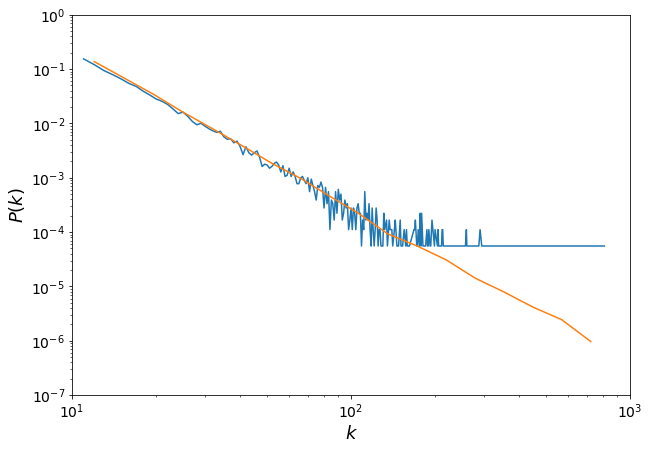

In [28]:
plt.figure(figsize=(10, 7))
x = []
y = []
for i in sorted(c):
    x.append(i)
    y.append(float(c[i]) / len(AB))


plt.plot(np.array(x), np.array(y))
pwl.plot_pdf(list(degrees))

plt.xlabel("$k$", fontsize=18)
plt.ylabel("$P(k)$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.axis([10, 1000, 0.0000001, 1])
plt.show()

In [29]:
fit_function = pwl.Fit(list(degrees), xmin=11)

/Users/Michele/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [30]:
fit_function.power_law.alpha

/Users/Michele/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


3.0529058123106254

In [31]:
fit_function.power_law.sigma

0.01530145649243661

In [32]:
fit_function.power_law.xmin

11.0

In [33]:
print("The average clustering coefficient of AB is")
nx.average_clustering(AB)

The average clustering coefficient of AB is


0.007591474716662366

In [30]:
print("The number of triangles is ", sum(list(nx.triangles(AB).values())) / 3)

The number of triangles is  24610.0


The AB network is also small-world.

In [39]:
nx.average_shortest_path_length(AB)

3.13362370131674

In [40]:
math.log(len(AB), 10)

4.255272505103306

### Compare the results with a random WS network

In [17]:
WS = nx.connected_watts_strogatz_graph(18000, 23, 0.2, 50)

In [18]:
print("The WS graph has", len(WS), "nodes")
print("and", len(WS.edges()), "edges")

The WS graph has 18000 nodes
and 198000 edges


In [19]:
nx.is_connected(WS)

True

In [20]:
ws_degrees = dict(WS.degree()).values()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000'),
  Text(0, 8000.0, '8000')])

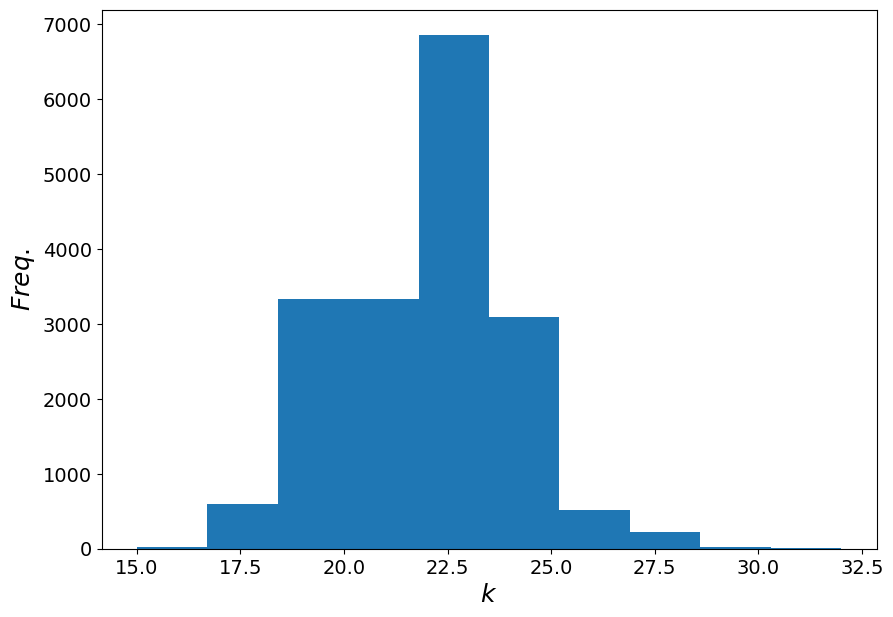

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(ws_degrees, bins=10)
plt.xlabel("$k$", fontsize=18)
plt.ylabel("$Freq.$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [22]:
print("The average clustering coefficient of WS is")
nx.average_clustering(WS)

The average clustering coefficient of WS is


0.3696213287301135

The Watt-Strogatz network is still small-world but with high clustering.

In [23]:
nx.average_shortest_path_length(WS)

4.037673481860104

In [47]:
math.log(len(WS), 10)

4.255272505103306

## Closeness Centrality

In connected graphs there is a natural distance metric between all pairs of nodes, defined by the length of their shortest paths. 
The '''farness''' of a node ''x'' is defined as the sum of its distances from all other nodes, and its closeness was defined by Bavelas as the reciprocal of the farness that is:


<center>
$C(x)= \frac{1}{\sum_y d(y,x)}.$
</center>


Thus, the more central a node is the lower its total distance from all other nodes. Note that taking distances ''from'' or ''to'' all other nodes is irrelevant in undirected graphs, whereas in directed graphs distances ''to'' a node are considered a more meaningful measure of centrality, as in general (e.g., in, the web) a node has little control over its incoming links.


**Be careful! Computing all the distances between pair of nodes can be intensive.**

In [37]:
close_centr = nx.closeness_centrality(H, 84424)

In [38]:
print(close_centr)

0.30557831489826576
